=== Dataset original ===
Filas: 8747
Columnas: 21

=== Dataset filtrado (en garantía) ===
Filas: 7244
Columnas: 7

Top repuestos con más fallas en garantía:
             Ref.  Cantidad
188       FK-1152      2033
194       FK-3302      1797
124       DK-3192       635
121       DK-1150       198
191       FK-3202       160
49     302TA18840       135
127       DK-5140       130
104    303R402060       128
103    303R402033       127
7    302LV11770-G        99


/tmp/ipython-input-90164574.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], errors="coerce")
/tmp/ipython-input-90164574.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], errors="coerce")
/tmp/ipython-input-90164574.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

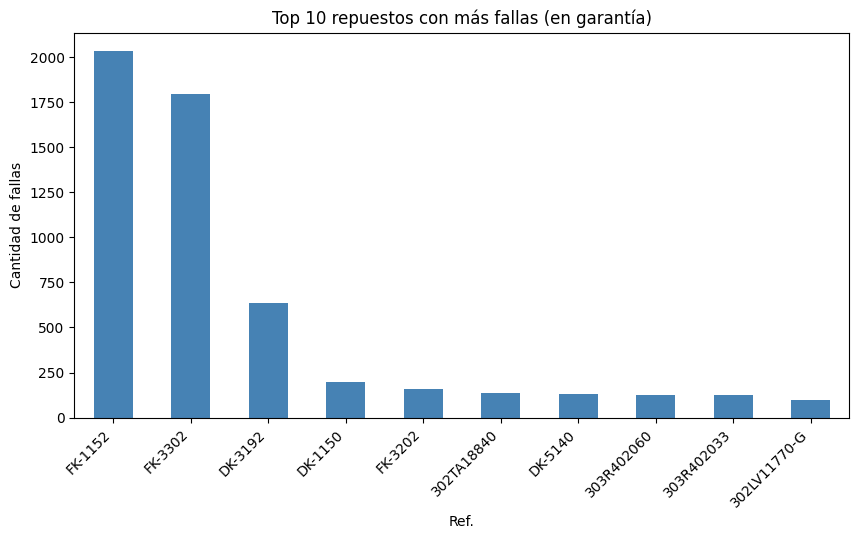

Número total de registros: 8747
Número de referencias únicas: 256
Referencia más frecuente: FK-1152
Número de fallas de la más frecuente: 2574

Percentiles de frecuencia de fallas:
count     256.000000
mean       34.125000
std       213.433684
min         1.000000
25%         1.000000
50%         2.000000
75%         9.000000
max      2574.000000
Name: count, dtype: float64


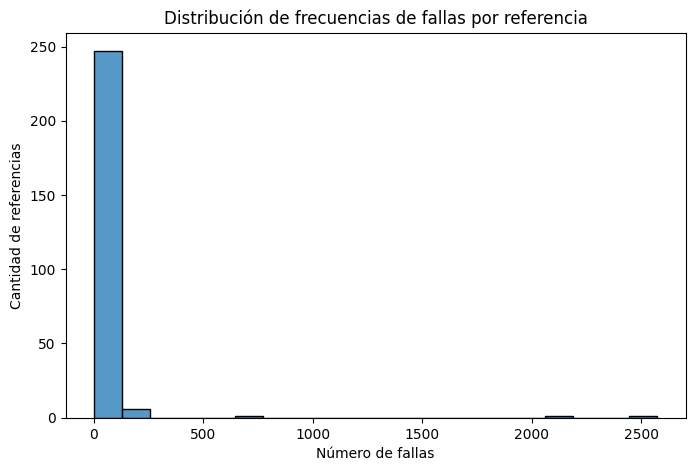

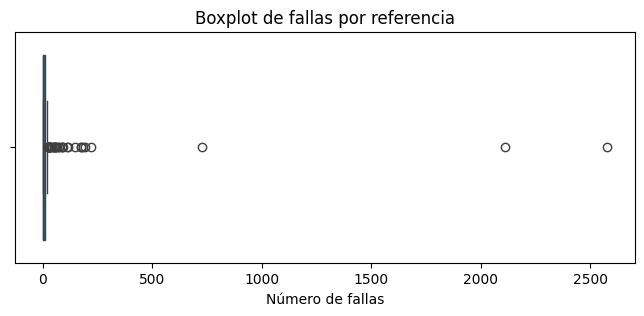

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

#from google.colab import files
#uploaded = files.upload()
# === 1. Cargar archivo completo ===
df_original = pd.read_excel("Datos_garantías.xlsx")

print("=== Dataset original ===")
print(f"Filas: {df_original.shape[0]}")
print(f"Columnas: {df_original.shape[1]}")

# === 2. Limpiar nombres de columnas ===
df_original.columns = df_original.columns.str.strip().str.replace(r"\s+", " ", regex=True)

# === 3. Seleccionar solo columnas necesarias ===
columnas_necesarias = [
    "Ref.",
    "Modelo",
    "Serie Maquina",
    "Fecha del Servicio (Paginas finales)",
    "Fecha Compra",
    "Descripcion Parte"
]
df = df_original[columnas_necesarias]

# === 4. Convertir fechas ===
fechas = ["Fecha del Servicio (Paginas finales)", "Fecha Compra"]
for col in fechas:
    df[col] = pd.to_datetime(df[col], errors="coerce")

# === 5. Calcular días desde compra y filtrar dentro de garantía (3 años ~ 1095 días) ===
df["Dias desde compra"] = (df["Fecha del Servicio (Paginas finales)"] - df["Fecha Compra"]).dt.days
df_garantia = df[df["Dias desde compra"] <= 1095]

print("\n=== Dataset filtrado (en garantía) ===")
print(f"Filas: {df_garantia.shape[0]}")
print(f"Columnas: {df_garantia.shape[1]}")

# === 6. Análisis: repuestos que más fallan ===
fallas_repuestos = (
    df_garantia.groupby("Ref.")
    .size()
    .reset_index(name="Cantidad")
    .sort_values("Cantidad", ascending=False)
)

print("\nTop repuestos con más fallas en garantía:")
print(fallas_repuestos.head(10))
# === 8. Visualización: Top 10 repuestos ===
top10 = fallas_repuestos.head(10).set_index("Ref.")

plt.figure(figsize=(10,5))
top10["Cantidad"].plot(kind="bar", color="steelblue")
plt.title("Top 10 repuestos con más fallas (en garantía)")
plt.ylabel("Cantidad de fallas")
plt.xticks(rotation=45, ha="right")
plt.show()

# 1. Estadísticas descriptivas para Ref.
conteo_ref = df["Ref."].value_counts()

print("Número total de registros:", len(df))
print("Número de referencias únicas:", df["Ref."].nunique())
print("Referencia más frecuente:", conteo_ref.idxmax())
print("Número de fallas de la más frecuente:", conteo_ref.max())

# Percentiles de frecuencia
print("\nPercentiles de frecuencia de fallas:")
print(conteo_ref.describe())

plt.figure(figsize=(8,5))
sns.histplot(conteo_ref, bins=20, kde=False)
plt.title("Distribución de frecuencias de fallas por referencia")
plt.xlabel("Número de fallas")
plt.ylabel("Cantidad de referencias")
plt.show()

# Boxplot de las frecuencias (para ver outliers)
plt.figure(figsize=(8,3))
sns.boxplot(x=conteo_ref)
plt.title("Boxplot de fallas por referencia")
plt.xlabel("Número de fallas")
plt.show()